In [1]:
# 本文实现Skipgram的Word2Vec，采用softmax (实际应该是CBOW)
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]]) # target
        random_labels.append(skip_grams[i][1]) # context word
    
    return random_inputs, random_labels

In [4]:
# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W 和 WT并不是转置关系
        self.W = nn.Linear(voc_size, embedding_size, bias=False) # voc_size -> embedding_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False) # embedding_size > voc_size Weight
        
    def forward(self, X):
        # X: [batch_size, voc_size]
        hidden_layer = self.W(X) # hidden_layer: [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer) # output_layer: [batch_size, voc_size]
        
        return output_layer

In [5]:
batch_size = 2
embedding_size = 2 # 嵌入层大小
sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit","dog cat animal", "cat monkey animal", "monkey dog animal"]

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

# 窗口大小为1的skip-gram
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    for w in context:
        skip_grams.append([target, w])

model = Word2Vec()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Training
for epoch in range(5000):
    input_batch, target_batch = random_batch()
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    # output:[batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 1.677351
Epoch: 2000 cost = 1.469793
Epoch: 3000 cost = 1.379454
Epoch: 4000 cost = 1.647096
Epoch: 5000 cost = 1.115684


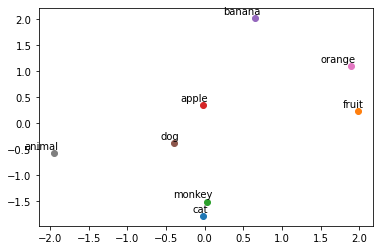

In [7]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = W[0][i].item(), W[1][i].item()
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [12]:
input_batch, target_batch = random_batch()
print(input_batch)
print(target_batch)
print(word_dict)
print(skip_grams)

[array([0., 0., 0., 0., 1., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0., 0.])]
[1, 4]
{'cat': 0, 'fruit': 1, 'monkey': 2, 'apple': 3, 'banana': 4, 'dog': 5, 'orange': 6, 'animal': 7}
[[4, 3], [4, 1], [1, 4], [1, 4], [4, 1], [4, 6], [6, 4], [6, 1], [1, 6], [1, 6], [6, 1], [6, 4], [4, 6], [4, 1], [1, 4], [1, 5], [5, 1], [5, 0], [0, 5], [0, 7], [7, 0], [7, 0], [0, 7], [0, 2], [2, 0], [2, 7], [7, 2], [7, 2], [2, 7], [2, 5], [5, 2], [5, 7]]
-1.95193350315094


In [21]:
# A为图的度矩阵，C为图的邻接矩阵 显示A^(-1) * C矩阵的每一行和为1
A = np.array([[1, 0, 0,0,0],
[0, 3, 0,0,0],
[0, 0, 3,0,0],
[0, 0, 0, 2,0],
[0, 0, 0,0 ,3]])
B = np.linalg.inv(A) # A的逆矩阵
C = np.array([[0, 1, 0,0,0],
[1, 0, 1,0,1],
[0, 1, 0,1,1],
[0, 0, 1, 0,1],
[0, 1, 1,1,0]])
print(np.dot(B, C))

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333]
 [0.         0.33333333 0.         0.33333333 0.33333333]
 [0.         0.         0.5        0.         0.5       ]
 [0.         0.33333333 0.33333333 0.33333333 0.        ]]
